In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
athletes = pd.read_csv('C:/Users/vatsa/Desktop/data analysis project/athlete_events.csv')
region = pd.read_csv('C:/Users/vatsa/Desktop/data analysis project/noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
newdataset = athletes.merge(region, how = 'left', on = 'NOC')        ### perform left join with common column as NOC 
newdataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
newdataset.rename(columns = {'region' : 'Region', 'notes' : 'Notes'})
newdataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
newdataset.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [8]:
 ### CHECKING IF THE DATASET HAS ANY MISSING VALUES ###

null_values = newdataset.isna()
missing_column = null_values.any()
missing_column


### this will tell us how many columns are there with missing values ### 

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [9]:
newdataset.isna().sum()

###counts the number of null values of each column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [10]:
lol = newdataset.columns[newdataset.isnull().any()].tolist()
lol


### printing the names of columns in a list which have missing values ###

['Age', 'Height', 'Weight', 'Medal', 'region', 'notes']

In [11]:
newdataset.query('Team == "India"').head()


### Printing data of Specific values or filtering data to get specific values from the dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [12]:
newdataset.query('Team == "India" and Medal == "Silver"').tail()


###  printing dataset of Athletes who were Indian and Won silver medal ###

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
221026,111047,"Joginder ""Gindi"" Singh",M,20.0,171.0,65.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN
221075,111083,Jaswant Singh,M,29.0,185.0,77.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN
221147,111123,Prithipal Singh,M,28.0,175.0,71.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN
221212,111159,Udham Singh Kular,M,32.0,168.0,58.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN
221239,111173,Raghbir Singh Bhola,M,33.0,183.0,67.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN


In [13]:
#### Print how many times a country particpated in olympics ####

participation1 = newdataset.Team.value_counts().head(10)
participation1


#### these are the conuntries with most participation 

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

In [14]:
participation2 = newdataset.Team.value_counts().tail(10)
participation2


#### these are the countries with least participation 

Newfoundland    1
Nrnberg         1
Solos Carex     1
Femur-18        1
Kln             1
Dow Jones       1
Danzig          1
Jeanette-25     1
Brynhild-2      1
Sunrise         1
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Participation by Countries'}, ylabel='Team'>

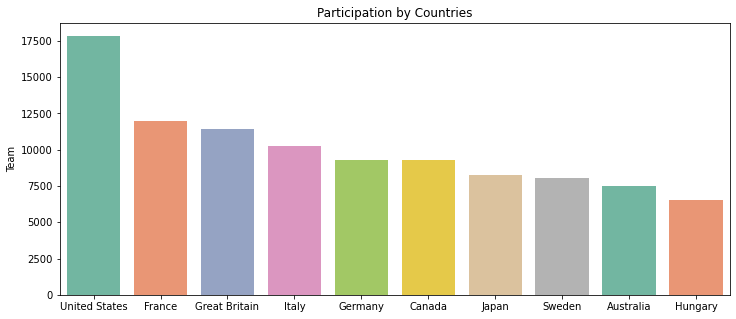

In [15]:
plt.figure(figsize = (12,5))                  ##### plt.figure(figsize=(width, height)) #####
plt.title('Participation by Countries')
sns.barplot(x = participation1.index, y = participation1, palette = 'Set2')          #### https://seaborn.pydata.org/generated/seaborn.lineplot.html ######

(array([1.0000e+00, 1.3000e+01, 3.9000e+01, 1.8700e+02, 8.3700e+02,
        2.2030e+03, 3.8520e+03, 5.3760e+03, 8.1520e+03, 1.1643e+04,
        1.5258e+04, 1.9164e+04, 2.0814e+04, 2.1875e+04, 2.1720e+04,
        1.9707e+04, 1.7675e+04, 1.6025e+04, 1.4043e+04, 1.1463e+04,
        9.4880e+03, 7.5590e+03, 6.2460e+03, 4.8000e+03, 3.9850e+03,
        3.1330e+03, 2.5030e+03, 1.9530e+03, 1.6120e+03, 1.4050e+03,
        1.2100e+03, 9.5300e+02, 8.6600e+02, 7.9300e+02, 6.8300e+02,
        5.8400e+02, 4.2900e+02, 4.0800e+02, 4.0700e+02, 3.6200e+02,
        2.7800e+02, 1.9900e+02, 2.4400e+02, 2.0000e+02, 1.6200e+02,
        1.0400e+02, 1.3100e+02, 6.9000e+01, 8.4000e+01, 8.7000e+01,
        8.8000e+01, 6.8000e+01, 6.2000e+01, 5.6000e+01, 3.0000e+01,
        8.4000e+01, 3.1000e+01, 2.5000e+01, 2.5000e+01, 6.0000e+01,
        2.8000e+01, 3.3000e+01, 2.4000e+01, 8.0000e+00, 1.2000e+01,
        4.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22

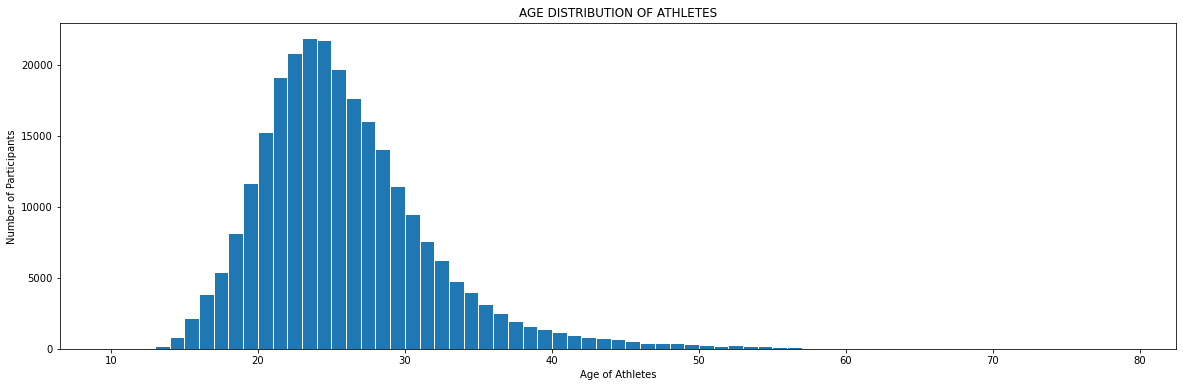

In [16]:
##### PRINTING THE AGE DISTRIBUTION OF ATHLETES 

plt.figure(figsize = (20,6)) 
plt.title("AGE DISTRIBUTION OF ATHLETES")
plt.ylabel('Number of Participants')
plt.xlabel('Age of Athletes')
plt.hist(newdataset.Age, np.arange(10,80), edgecolor = 'white')


In [17]:
#### FROM THE DATASET PRINT THE SPORTS WHICH ARE PLAYED DURING WINTER OLYMPICS 

winter_sports = newdataset[newdataset.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [18]:
#### FROM THE DATASET PRINT THE SPORTS WHICH ARE PLAYED DURING SUMMER OLYMPICS 

Summer_sports = newdataset[newdataset.Season == 'Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [19]:
gender_count = newdataset.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0xa30e280>,
 [Text(-0.7147310163003325, 0.8361576252945936, 'M'),
  Text(0.7147309380136029, -0.8361576922125369, 'F')],
 [Text(-0.38985328161836313, 0.4560859774334146, '72.5%'),
  Text(0.38985323891651064, -0.45608601393411097, '27.5%')])

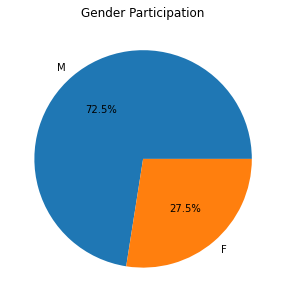

In [20]:
plt.figure(figsize = (12,5))                  ##### plt.figure(figsize=(width, height)) #####
plt.title('Gender Participation')
plt.pie(gender_count, autopct = '%1.1f%%', labels = gender_count.index)            ##### autopct gives the percentage of each section

In [21]:
medal_count = newdataset.Medal.value_counts()
medal_count


#### total number of medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [42]:
###### COunt the total number of Female participants(in summer olympics) of each year 
total_female = newdataset[(newdataset.Sex == 'F') & (newdataset.Season == 'Summer')][['Sex', 'Year']]
total_female = total_female.groupby('Year').count()
total_female.tail()

,Sex
Year,
2000,5431
2004,5546
2008,5816
2012,5815
2016,6223


In [53]:
total_female1 = newdataset[(newdataset.Sex == 'F') & (newdataset.Season == 'Summer')]

Text(0.5, 1.0, 'Female Atheletes')

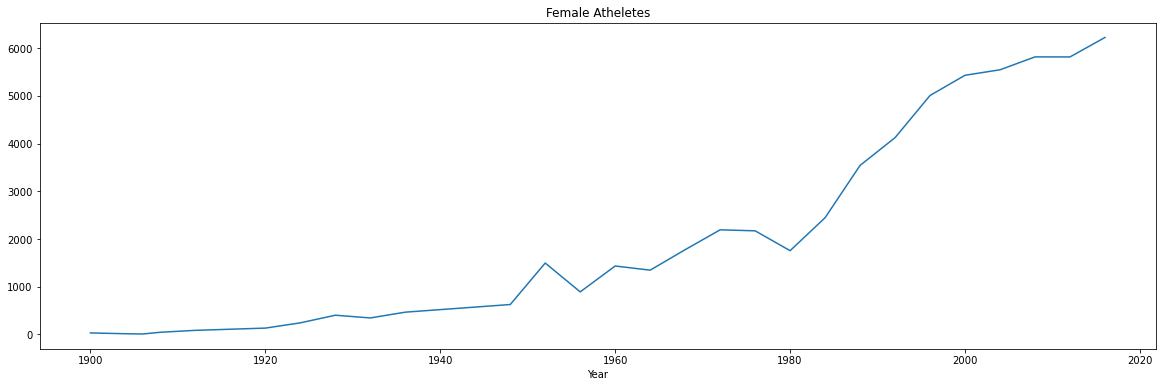

In [54]:
part = total_female1.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (20,6))
part.loc[:,'F'].plot()
plt.title('Female Atheletes')